In [1]:
import torch
import numpy as np
import data
import tqdm
import models
from torchvision.transforms import v2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

/home/anirudh/Documents/GSoC/DeepLense/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


In [ ]:
def transform():
    """
    Data augmentation by random rotation, and random scaling between 0.8 to 1.2

    :return: RandomAffine module that performs the transformation 
    """
    return v2.RandomAffine(degrees=(-180,180),scale=(0.8,1.2))

In [2]:
EPOCHS = 200
BATCH_SIZE = 15
LR = 1e-4
OUT_CLASSES = 3

In [3]:
train_dataset = data.LensingDataset('index.csv','../dataset/train/',transform=transform)
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [0.9, 0.1])

train_dataloader = torch.utils.data.DataLoader(train_dataset,shuffle=True,batch_size=BATCH_SIZE,num_workers=15)
val_dataloader = torch.utils.data.DataLoader(val_dataset,shuffle=True,batch_size=BATCH_SIZE,num_workers=15)

In [5]:
model = models.ResNet18().to(device)


loss_fn = torch.nn.CrossEntropyLoss()
opt = torch.optim.Adam(params=model.parameters(),lr=LR)
history = {'val_loss':[], 'acc':[], 'loss':[]}
best_val_loss = np.inf
best_weights = None
for epoch in range(EPOCHS):
    losses = []
    accs = []
    model.train()
    for i,(x,y) in enumerate(tqdm.tqdm(train_dataloader, desc=f"Training epoch {epoch+1}")):
        (x, y) = (x.float().to(device), y.to(device))
        x = model(x)
        loss = loss_fn(x,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        label_indices = torch.argmax(y, 1)
        prediction_indices = torch.argmax(x, 1)
        acc = float(torch.sum(label_indices == prediction_indices))/float(len(label_indices))
        losses.append(float(loss))
        accs.append(float(acc))
    print("Training at epoch %d/%d: %.4f with acc=%.5f at LR=%.6f"%(epoch+1,EPOCHS,np.mean(losses),np.mean(accs),opt.param_groups[0]['lr']))
    history['loss'].append(np.mean(losses))
    model.eval()
    losses = []
    accs = []
    for i,(x,y) in enumerate(tqdm.tqdm(val_dataloader, desc=f"Validation epoch {epoch}")):
        (x, y) = (x.float().to(device), y.to(device))
        x = model(x)
        val_loss = loss_fn(x,y)
        label_indices = torch.argmax(y, 1)
        prediction_indices = torch.argmax(x, 1)
        acc = float(torch.sum(label_indices == prediction_indices))/float(len(label_indices))
        losses.append(float(val_loss))
        accs.append(float(acc))
    if best_val_loss > np.mean(losses):
        best_val_loss = np.mean(losses)
        best_weights = model.state_dict()
    history['val_loss'].append(np.mean(losses))
    history['acc'].append(np.mean(accs))
    print(f"Validation at epoch {epoch+1}/{EPOCHS}: {np.mean(losses)} with acc={np.mean(accs)} at LR={opt.param_groups[0]['lr']}")



Training epoch 1: 100%|██████████| 1800/1800 [03:01<00:00,  9.89it/s]


Training at epoch 1/200: 1.1370 with acc=0.33159 at LR=0.000100


Validation epoch 0: 100%|██████████| 200/200 [00:08<00:00, 24.67it/s]


Validation at epoch 1/200: 1.131750868856907 with acc=0.3456666666666666 at LR=0.0001


Training epoch 2: 100%|██████████| 1800/1800 [03:00<00:00,  9.99it/s]


Training at epoch 2/200: 1.1145 with acc=0.33019 at LR=0.000100


Validation epoch 1: 100%|██████████| 200/200 [00:08<00:00, 24.69it/s]


Validation at epoch 2/200: 1.106635091304779 with acc=0.31466666666666665 at LR=0.0001


Training epoch 3: 100%|██████████| 1800/1800 [03:00<00:00,  9.99it/s]


Training at epoch 3/200: 1.1082 with acc=0.33678 at LR=0.000100


Validation epoch 2: 100%|██████████| 200/200 [00:08<00:00, 24.73it/s]


Validation at epoch 3/200: 1.1127287751436234 with acc=0.31133333333333335 at LR=0.0001


Training epoch 4: 100%|██████████| 1800/1800 [02:59<00:00, 10.01it/s]


Training at epoch 4/200: 1.1063 with acc=0.33144 at LR=0.000100


Validation epoch 3: 100%|██████████| 200/200 [00:07<00:00, 25.24it/s]


Validation at epoch 4/200: 1.100699828863144 with acc=0.34666666666666673 at LR=0.0001


Training epoch 5: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 5/200: 1.1058 with acc=0.33111 at LR=0.000100


Validation epoch 4: 100%|██████████| 200/200 [00:08<00:00, 24.95it/s]


Validation at epoch 5/200: 1.1114947485923767 with acc=0.33333333333333326 at LR=0.0001


Training epoch 6: 100%|██████████| 1800/1800 [03:00<00:00,  9.99it/s]


Training at epoch 6/200: 1.1051 with acc=0.33052 at LR=0.000100


Validation epoch 5: 100%|██████████| 200/200 [00:07<00:00, 25.16it/s]


Validation at epoch 6/200: 1.1000933361053467 with acc=0.35400000000000004 at LR=0.0001


Training epoch 7: 100%|██████████| 1800/1800 [02:59<00:00, 10.02it/s]


Training at epoch 7/200: 1.1060 with acc=0.33619 at LR=0.000100


Validation epoch 6: 100%|██████████| 200/200 [00:07<00:00, 25.19it/s]


Validation at epoch 7/200: 1.100336127281189 with acc=0.3443333333333334 at LR=0.0001


Training epoch 8: 100%|██████████| 1800/1800 [02:59<00:00, 10.02it/s]


Training at epoch 8/200: 1.1063 with acc=0.33781 at LR=0.000100


Validation epoch 7: 100%|██████████| 200/200 [00:07<00:00, 25.16it/s]


Validation at epoch 8/200: 1.1038444119691848 with acc=0.332 at LR=0.0001


Training epoch 9: 100%|██████████| 1800/1800 [02:59<00:00, 10.01it/s]


Training at epoch 9/200: 1.1050 with acc=0.33452 at LR=0.000100


Validation epoch 8: 100%|██████████| 200/200 [00:08<00:00, 24.81it/s]


Validation at epoch 9/200: 1.1000132620334626 with acc=0.33299999999999996 at LR=0.0001


Training epoch 10: 100%|██████████| 1800/1800 [03:00<00:00,  9.97it/s]


Training at epoch 10/200: 1.1040 with acc=0.33344 at LR=0.000100


Validation epoch 9: 100%|██████████| 200/200 [00:08<00:00, 24.21it/s]


Validation at epoch 10/200: 1.0993077671527862 with acc=0.32766666666666666 at LR=0.0001


Training epoch 11: 100%|██████████| 1800/1800 [03:01<00:00,  9.93it/s]


Training at epoch 11/200: 1.1042 with acc=0.33252 at LR=0.000100


Validation epoch 10: 100%|██████████| 200/200 [00:08<00:00, 24.34it/s]


Validation at epoch 11/200: 1.1068540704250336 with acc=0.3456666666666666 at LR=0.0001


Training epoch 12: 100%|██████████| 1800/1800 [03:01<00:00,  9.93it/s]


Training at epoch 12/200: 1.1035 with acc=0.33533 at LR=0.000100


Validation epoch 11: 100%|██████████| 200/200 [00:08<00:00, 24.24it/s]


Validation at epoch 12/200: 1.0985336935520171 with acc=0.343 at LR=0.0001


Training epoch 13: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 13/200: 1.1031 with acc=0.33785 at LR=0.000100


Validation epoch 12: 100%|██████████| 200/200 [00:08<00:00, 24.37it/s]


Validation at epoch 13/200: 1.1094903135299683 with acc=0.31133333333333335 at LR=0.0001


Training epoch 14: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 14/200: 1.1035 with acc=0.33796 at LR=0.000100


Validation epoch 13: 100%|██████████| 200/200 [00:08<00:00, 24.41it/s]


Validation at epoch 14/200: 1.1002698016166688 with acc=0.35166666666666674 at LR=0.0001


Training epoch 15: 100%|██████████| 1800/1800 [03:00<00:00,  9.95it/s]


Training at epoch 15/200: 1.1031 with acc=0.33519 at LR=0.000100


Validation epoch 14: 100%|██████████| 200/200 [00:08<00:00, 24.42it/s]


Validation at epoch 15/200: 1.100327136516571 with acc=0.35033333333333333 at LR=0.0001


Training epoch 16: 100%|██████████| 1800/1800 [03:00<00:00,  9.95it/s]


Training at epoch 16/200: 1.1028 with acc=0.33211 at LR=0.000100


Validation epoch 15: 100%|██████████| 200/200 [00:08<00:00, 24.39it/s]


Validation at epoch 16/200: 1.1076209062337876 with acc=0.3203333333333333 at LR=0.0001


Training epoch 17: 100%|██████████| 1800/1800 [03:00<00:00,  9.95it/s]


Training at epoch 17/200: 1.1034 with acc=0.33478 at LR=0.000100


Validation epoch 16: 100%|██████████| 200/200 [00:08<00:00, 24.50it/s]


Validation at epoch 17/200: 1.117492669224739 with acc=0.32733333333333337 at LR=0.0001


Training epoch 18: 100%|██████████| 1800/1800 [03:00<00:00,  9.95it/s]


Training at epoch 18/200: 1.1034 with acc=0.33770 at LR=0.000100


Validation epoch 17: 100%|██████████| 200/200 [00:08<00:00, 24.50it/s]


Validation at epoch 18/200: 1.1032416927814483 with acc=0.311 at LR=0.0001


Training epoch 19: 100%|██████████| 1800/1800 [03:00<00:00,  9.95it/s]


Training at epoch 19/200: 1.1034 with acc=0.33578 at LR=0.000100


Validation epoch 18: 100%|██████████| 200/200 [00:08<00:00, 24.43it/s]


Validation at epoch 19/200: 1.1062374824285508 with acc=0.34666666666666673 at LR=0.0001


Training epoch 20: 100%|██████████| 1800/1800 [03:00<00:00,  9.95it/s]


Training at epoch 20/200: 1.1024 with acc=0.33341 at LR=0.000100


Validation epoch 19: 100%|██████████| 200/200 [00:08<00:00, 24.35it/s]


Validation at epoch 20/200: 1.1005786204338073 with acc=0.3436666666666667 at LR=0.0001


Training epoch 21: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 21/200: 1.1024 with acc=0.33596 at LR=0.000100


Validation epoch 20: 100%|██████████| 200/200 [00:08<00:00, 24.34it/s]


Validation at epoch 21/200: 1.11152214884758 with acc=0.316 at LR=0.0001


Training epoch 22: 100%|██████████| 1800/1800 [03:00<00:00,  9.95it/s]


Training at epoch 22/200: 1.1024 with acc=0.33781 at LR=0.000100


Validation epoch 21: 100%|██████████| 200/200 [00:08<00:00, 24.39it/s]


Validation at epoch 22/200: 1.126483139693737 with acc=0.31133333333333335 at LR=0.0001


Training epoch 23: 100%|██████████| 1800/1800 [03:00<00:00,  9.95it/s]


Training at epoch 23/200: 1.1022 with acc=0.33207 at LR=0.000100


Validation epoch 22: 100%|██████████| 200/200 [00:08<00:00, 24.48it/s]


Validation at epoch 23/200: 1.0989413118362428 with acc=0.32966666666666666 at LR=0.0001


Training epoch 24: 100%|██████████| 1800/1800 [03:01<00:00,  9.93it/s]


Training at epoch 24/200: 1.1019 with acc=0.33719 at LR=0.000100


Validation epoch 23: 100%|██████████| 200/200 [00:08<00:00, 24.38it/s]


Validation at epoch 24/200: 1.1247294321656227 with acc=0.34366666666666673 at LR=0.0001


Training epoch 25: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 25/200: 1.1025 with acc=0.33704 at LR=0.000100


Validation epoch 24: 100%|██████████| 200/200 [00:08<00:00, 24.27it/s]


Validation at epoch 25/200: 1.1001847809553147 with acc=0.32900000000000007 at LR=0.0001


Training epoch 26: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 26/200: 1.1032 with acc=0.33570 at LR=0.000100


Validation epoch 25: 100%|██████████| 200/200 [00:08<00:00, 24.35it/s]


Validation at epoch 26/200: 1.0994366562366487 with acc=0.327 at LR=0.0001


Training epoch 27: 100%|██████████| 1800/1800 [03:01<00:00,  9.93it/s]


Training at epoch 27/200: 1.1024 with acc=0.33422 at LR=0.000100


Validation epoch 26: 100%|██████████| 200/200 [00:08<00:00, 24.31it/s]


Validation at epoch 27/200: 1.1059411811828612 with acc=0.31133333333333335 at LR=0.0001


Training epoch 28: 100%|██████████| 1800/1800 [03:01<00:00,  9.93it/s]


Training at epoch 28/200: 1.1020 with acc=0.34293 at LR=0.000100


Validation epoch 27: 100%|██████████| 200/200 [00:08<00:00, 24.38it/s]


Validation at epoch 28/200: 1.1160922706127168 with acc=0.31300000000000006 at LR=0.0001


Training epoch 29: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 29/200: 1.1026 with acc=0.33115 at LR=0.000100


Validation epoch 28: 100%|██████████| 200/200 [00:08<00:00, 24.38it/s]


Validation at epoch 29/200: 1.0997236520051956 with acc=0.33299999999999996 at LR=0.0001


Training epoch 30: 100%|██████████| 1800/1800 [03:00<00:00,  9.95it/s]


Training at epoch 30/200: 1.1015 with acc=0.33878 at LR=0.000100


Validation epoch 29: 100%|██████████| 200/200 [00:08<00:00, 24.37it/s]


Validation at epoch 30/200: 1.1035507267713547 with acc=0.3390000000000001 at LR=0.0001


Training epoch 31: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 31/200: 1.1023 with acc=0.33626 at LR=0.000100


Validation epoch 30: 100%|██████████| 200/200 [00:08<00:00, 24.58it/s]


Validation at epoch 31/200: 1.1050559490919114 with acc=0.33866666666666667 at LR=0.0001


Training epoch 32: 100%|██████████| 1800/1800 [03:00<00:00,  9.95it/s]


Training at epoch 32/200: 1.1021 with acc=0.33378 at LR=0.000100


Validation epoch 31: 100%|██████████| 200/200 [00:08<00:00, 24.46it/s]


Validation at epoch 32/200: 1.109979483485222 with acc=0.311 at LR=0.0001


Training epoch 33: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 33/200: 1.1021 with acc=0.33696 at LR=0.000100


Validation epoch 32: 100%|██████████| 200/200 [00:08<00:00, 24.40it/s]


Validation at epoch 33/200: 1.103286730647087 with acc=0.33799999999999997 at LR=0.0001


Training epoch 34: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 34/200: 1.1022 with acc=0.33581 at LR=0.000100


Validation epoch 33: 100%|██████████| 200/200 [00:08<00:00, 24.39it/s]


Validation at epoch 34/200: 1.110442270040512 with acc=0.336 at LR=0.0001


Training epoch 35: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 35/200: 1.1019 with acc=0.33678 at LR=0.000100


Validation epoch 34: 100%|██████████| 200/200 [00:08<00:00, 24.46it/s]


Validation at epoch 35/200: 1.100891917347908 with acc=0.34900000000000003 at LR=0.0001


Training epoch 36: 100%|██████████| 1800/1800 [03:01<00:00,  9.93it/s]


Training at epoch 36/200: 1.1016 with acc=0.33567 at LR=0.000100


Validation epoch 35: 100%|██████████| 200/200 [00:08<00:00, 24.28it/s]


Validation at epoch 36/200: 1.0984431779384614 with acc=0.3403333333333333 at LR=0.0001


Training epoch 37: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 37/200: 1.1024 with acc=0.33167 at LR=0.000100


Validation epoch 36: 100%|██████████| 200/200 [00:08<00:00, 24.36it/s]


Validation at epoch 37/200: 1.1037552434206008 with acc=0.33 at LR=0.0001


Training epoch 38: 100%|██████████| 1800/1800 [03:01<00:00,  9.93it/s]


Training at epoch 38/200: 1.1024 with acc=0.33000 at LR=0.000100


Validation epoch 37: 100%|██████████| 200/200 [00:08<00:00, 24.45it/s]


Validation at epoch 38/200: 1.0986023831367493 with acc=0.34166666666666673 at LR=0.0001


Training epoch 39: 100%|██████████| 1800/1800 [03:01<00:00,  9.92it/s]


Training at epoch 39/200: 1.1021 with acc=0.33670 at LR=0.000100


Validation epoch 38: 100%|██████████| 200/200 [00:08<00:00, 24.39it/s]


Validation at epoch 39/200: 1.1026806402206422 with acc=0.3263333333333333 at LR=0.0001


Training epoch 40: 100%|██████████| 1800/1800 [03:01<00:00,  9.94it/s]


Training at epoch 40/200: 1.1016 with acc=0.33581 at LR=0.000100


Validation epoch 39: 100%|██████████| 200/200 [00:08<00:00, 24.16it/s]


Validation at epoch 40/200: 1.0995547199249267 with acc=0.3340000000000001 at LR=0.0001


Training epoch 41: 100%|██████████| 1800/1800 [03:00<00:00,  9.99it/s]


Training at epoch 41/200: 1.1014 with acc=0.33726 at LR=0.000100


Validation epoch 40: 100%|██████████| 200/200 [00:08<00:00, 24.87it/s]


Validation at epoch 41/200: 1.0995531755685806 with acc=0.3276666666666667 at LR=0.0001


Training epoch 42: 100%|██████████| 1800/1800 [03:00<00:00, 10.00it/s]


Training at epoch 42/200: 1.1011 with acc=0.33833 at LR=0.000100


Validation epoch 41: 100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Validation at epoch 42/200: 1.1001315385103225 with acc=0.35100000000000003 at LR=0.0001


Training epoch 43: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 43/200: 1.1014 with acc=0.33263 at LR=0.000100


Validation epoch 42: 100%|██████████| 200/200 [00:08<00:00, 24.90it/s]


Validation at epoch 43/200: 1.1002858072519301 with acc=0.3440000000000001 at LR=0.0001


Training epoch 44: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 44/200: 1.1011 with acc=0.34130 at LR=0.000100


Validation epoch 43: 100%|██████████| 200/200 [00:08<00:00, 24.89it/s]


Validation at epoch 44/200: 1.1022440844774246 with acc=0.31466666666666665 at LR=0.0001


Training epoch 45: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 45/200: 1.1016 with acc=0.33370 at LR=0.000100


Validation epoch 44: 100%|██████████| 200/200 [00:08<00:00, 24.95it/s]


Validation at epoch 45/200: 1.0988930875062943 with acc=0.336 at LR=0.0001


Training epoch 46: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 46/200: 1.1013 with acc=0.33259 at LR=0.000100


Validation epoch 45: 100%|██████████| 200/200 [00:08<00:00, 24.94it/s]


Validation at epoch 46/200: 1.1000899678468705 with acc=0.32166666666666666 at LR=0.0001


Training epoch 47: 100%|██████████| 1800/1800 [02:59<00:00, 10.02it/s]


Training at epoch 47/200: 1.1013 with acc=0.33341 at LR=0.000100


Validation epoch 46: 100%|██████████| 200/200 [00:08<00:00, 24.87it/s]


Validation at epoch 47/200: 1.1029517841339112 with acc=0.31 at LR=0.0001


Training epoch 48: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 48/200: 1.1011 with acc=0.33719 at LR=0.000100


Validation epoch 47: 100%|██████████| 200/200 [00:07<00:00, 25.06it/s]


Validation at epoch 48/200: 1.0977223509550094 with acc=0.35200000000000004 at LR=0.0001


Training epoch 49: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 49/200: 1.1011 with acc=0.33793 at LR=0.000100


Validation epoch 48: 100%|██████████| 200/200 [00:07<00:00, 25.00it/s]


Validation at epoch 49/200: 1.0988900887966155 with acc=0.3393333333333334 at LR=0.0001


Training epoch 50: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 50/200: 1.1011 with acc=0.33178 at LR=0.000100


Validation epoch 49: 100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Validation at epoch 50/200: 1.0994132620096206 with acc=0.33866666666666667 at LR=0.0001


Training epoch 51: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 51/200: 1.1008 with acc=0.33700 at LR=0.000100


Validation epoch 50: 100%|██████████| 200/200 [00:08<00:00, 24.89it/s]


Validation at epoch 51/200: 1.1052680003643036 with acc=0.322 at LR=0.0001


Training epoch 52: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 52/200: 1.1010 with acc=0.33881 at LR=0.000100


Validation epoch 51: 100%|██████████| 200/200 [00:08<00:00, 24.91it/s]


Validation at epoch 52/200: 1.1008829742670059 with acc=0.31133333333333335 at LR=0.0001


Training epoch 53: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 53/200: 1.1005 with acc=0.33281 at LR=0.000100


Validation epoch 52: 100%|██████████| 200/200 [00:08<00:00, 24.93it/s]


Validation at epoch 53/200: 1.1005888134241104 with acc=0.317 at LR=0.0001


Training epoch 54: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 54/200: 1.1006 with acc=0.33441 at LR=0.000100


Validation epoch 53: 100%|██████████| 200/200 [00:08<00:00, 24.72it/s]


Validation at epoch 54/200: 1.099194303750992 with acc=0.3486666666666667 at LR=0.0001


Training epoch 55: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 55/200: 1.1005 with acc=0.33415 at LR=0.000100


Validation epoch 54: 100%|██████████| 200/200 [00:08<00:00, 25.00it/s]


Validation at epoch 55/200: 1.101139332652092 with acc=0.31433333333333335 at LR=0.0001


Training epoch 56: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 56/200: 1.1009 with acc=0.33611 at LR=0.000100


Validation epoch 55: 100%|██████████| 200/200 [00:08<00:00, 24.98it/s]


Validation at epoch 56/200: 1.1143683695793152 with acc=0.33766666666666667 at LR=0.0001


Training epoch 57: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 57/200: 1.1003 with acc=0.33807 at LR=0.000100


Validation epoch 56: 100%|██████████| 200/200 [00:07<00:00, 25.00it/s]


Validation at epoch 57/200: 1.1044242256879806 with acc=0.3313333333333333 at LR=0.0001


Training epoch 58: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 58/200: 1.1004 with acc=0.33648 at LR=0.000100


Validation epoch 57: 100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Validation at epoch 58/200: 1.0991329085826873 with acc=0.34166666666666673 at LR=0.0001


Training epoch 59: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 59/200: 1.1004 with acc=0.33511 at LR=0.000100


Validation epoch 58: 100%|██████████| 200/200 [00:08<00:00, 24.94it/s]


Validation at epoch 59/200: 1.1018819087743759 with acc=0.3203333333333333 at LR=0.0001


Training epoch 60: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 60/200: 1.1002 with acc=0.33770 at LR=0.000100


Validation epoch 59: 100%|██████████| 200/200 [00:07<00:00, 25.01it/s]


Validation at epoch 60/200: 1.1050138127803804 with acc=0.345 at LR=0.0001


Training epoch 61: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 61/200: 1.1000 with acc=0.33556 at LR=0.000100


Validation epoch 60: 100%|██████████| 200/200 [00:08<00:00, 24.98it/s]


Validation at epoch 61/200: 1.1035775232315064 with acc=0.3433333333333334 at LR=0.0001


Training epoch 62: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 62/200: 1.1006 with acc=0.33185 at LR=0.000100


Validation epoch 61: 100%|██████████| 200/200 [00:08<00:00, 24.90it/s]


Validation at epoch 62/200: 1.0989599102735519 with acc=0.31766666666666665 at LR=0.0001


Training epoch 63: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 63/200: 1.1002 with acc=0.32807 at LR=0.000100


Validation epoch 62: 100%|██████████| 200/200 [00:07<00:00, 25.06it/s]


Validation at epoch 63/200: 1.0991680455207824 with acc=0.3413333333333334 at LR=0.0001


Training epoch 64: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 64/200: 1.0997 with acc=0.33789 at LR=0.000100


Validation epoch 63: 100%|██████████| 200/200 [00:07<00:00, 25.03it/s]


Validation at epoch 64/200: 1.1047606694698333 with acc=0.31133333333333335 at LR=0.0001


Training epoch 65: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 65/200: 1.1001 with acc=0.34022 at LR=0.000100


Validation epoch 64: 100%|██████████| 200/200 [00:07<00:00, 25.08it/s]


Validation at epoch 65/200: 1.0993317437171937 with acc=0.3353333333333333 at LR=0.0001


Training epoch 66: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 66/200: 1.0998 with acc=0.33841 at LR=0.000100


Validation epoch 65: 100%|██████████| 200/200 [00:08<00:00, 24.90it/s]


Validation at epoch 66/200: 1.0978861343860626 with acc=0.3486666666666667 at LR=0.0001


Training epoch 67: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 67/200: 1.1000 with acc=0.33981 at LR=0.000100


Validation epoch 66: 100%|██████████| 200/200 [00:08<00:00, 24.98it/s]


Validation at epoch 67/200: 1.0980808770656585 with acc=0.3436666666666667 at LR=0.0001


Training epoch 68: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 68/200: 1.1003 with acc=0.33600 at LR=0.000100


Validation epoch 67: 100%|██████████| 200/200 [00:08<00:00, 24.98it/s]


Validation at epoch 68/200: 1.097887555360794 with acc=0.3593333333333334 at LR=0.0001


Training epoch 69: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 69/200: 1.0992 with acc=0.34300 at LR=0.000100


Validation epoch 68: 100%|██████████| 200/200 [00:07<00:00, 25.01it/s]


Validation at epoch 69/200: 1.1058134508132935 with acc=0.31 at LR=0.0001


Training epoch 70: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 70/200: 1.1006 with acc=0.33163 at LR=0.000100


Validation epoch 69: 100%|██████████| 200/200 [00:08<00:00, 24.95it/s]


Validation at epoch 70/200: 1.1014051985740663 with acc=0.32833333333333337 at LR=0.0001


Training epoch 71: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 71/200: 1.1000 with acc=0.33359 at LR=0.000100


Validation epoch 70: 100%|██████████| 200/200 [00:08<00:00, 24.95it/s]


Validation at epoch 71/200: 1.1117264461517333 with acc=0.31433333333333335 at LR=0.0001


Training epoch 72: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 72/200: 1.0997 with acc=0.34004 at LR=0.000100


Validation epoch 71: 100%|██████████| 200/200 [00:07<00:00, 25.04it/s]


Validation at epoch 72/200: 1.099399802684784 with acc=0.35200000000000004 at LR=0.0001


Training epoch 73: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 73/200: 1.0998 with acc=0.33367 at LR=0.000100


Validation epoch 72: 100%|██████████| 200/200 [00:07<00:00, 25.03it/s]


Validation at epoch 73/200: 1.1011408561468123 with acc=0.3456666666666667 at LR=0.0001


Training epoch 74: 100%|██████████| 1800/1800 [02:58<00:00, 10.06it/s]


Training at epoch 74/200: 1.1000 with acc=0.33385 at LR=0.000100


Validation epoch 73: 100%|██████████| 200/200 [00:07<00:00, 25.01it/s]


Validation at epoch 74/200: 1.0979945385456085 with acc=0.3476666666666667 at LR=0.0001


Training epoch 75: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 75/200: 1.0998 with acc=0.34044 at LR=0.000100


Validation epoch 74: 100%|██████████| 200/200 [00:08<00:00, 24.99it/s]


Validation at epoch 75/200: 1.1038343781232833 with acc=0.3203333333333333 at LR=0.0001


Training epoch 76: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 76/200: 1.0995 with acc=0.34104 at LR=0.000100


Validation epoch 75: 100%|██████████| 200/200 [00:07<00:00, 25.05it/s]


Validation at epoch 76/200: 1.1004346007108687 with acc=0.35333333333333333 at LR=0.0001


Training epoch 77: 100%|██████████| 1800/1800 [02:59<00:00, 10.06it/s]


Training at epoch 77/200: 1.0999 with acc=0.33819 at LR=0.000100


Validation epoch 76: 100%|██████████| 200/200 [00:07<00:00, 25.02it/s]


Validation at epoch 77/200: 1.0983743727207185 with acc=0.353 at LR=0.0001


Training epoch 78: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 78/200: 1.0995 with acc=0.34267 at LR=0.000100


Validation epoch 77: 100%|██████████| 200/200 [00:07<00:00, 25.01it/s]


Validation at epoch 78/200: 1.0998839151859283 with acc=0.3506666666666666 at LR=0.0001


Training epoch 79: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 79/200: 1.0993 with acc=0.34441 at LR=0.000100


Validation epoch 78: 100%|██████████| 200/200 [00:08<00:00, 24.91it/s]


Validation at epoch 79/200: 1.0987200105190278 with acc=0.3406666666666666 at LR=0.0001


Training epoch 80: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 80/200: 1.0998 with acc=0.33689 at LR=0.000100


Validation epoch 79: 100%|██████████| 200/200 [00:08<00:00, 24.93it/s]


Validation at epoch 80/200: 1.0994413566589356 with acc=0.32300000000000006 at LR=0.0001


Training epoch 81: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 81/200: 1.0996 with acc=0.33607 at LR=0.000100


Validation epoch 80: 100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Validation at epoch 81/200: 1.0992818588018418 with acc=0.31633333333333336 at LR=0.0001


Training epoch 82: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 82/200: 1.0992 with acc=0.33770 at LR=0.000100


Validation epoch 81: 100%|██████████| 200/200 [00:08<00:00, 25.00it/s]


Validation at epoch 82/200: 1.1033051747083664 with acc=0.3353333333333333 at LR=0.0001


Training epoch 83: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 83/200: 1.0991 with acc=0.34267 at LR=0.000100


Validation epoch 82: 100%|██████████| 200/200 [00:08<00:00, 24.71it/s]


Validation at epoch 83/200: 1.1098501208424567 with acc=0.3393333333333334 at LR=0.0001


Training epoch 84: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 84/200: 1.0994 with acc=0.34304 at LR=0.000100


Validation epoch 83: 100%|██████████| 200/200 [00:08<00:00, 24.99it/s]


Validation at epoch 84/200: 1.1031354290246964 with acc=0.3153333333333333 at LR=0.0001


Training epoch 85: 100%|██████████| 1800/1800 [02:58<00:00, 10.06it/s]


Training at epoch 85/200: 1.0995 with acc=0.33663 at LR=0.000100


Validation epoch 84: 100%|██████████| 200/200 [00:08<00:00, 24.97it/s]


Validation at epoch 85/200: 1.1059324765205383 with acc=0.32933333333333337 at LR=0.0001


Training epoch 86: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 86/200: 1.0996 with acc=0.33578 at LR=0.000100


Validation epoch 85: 100%|██████████| 200/200 [00:08<00:00, 25.00it/s]


Validation at epoch 86/200: 1.0973004925251006 with acc=0.3476666666666667 at LR=0.0001


Training epoch 87: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 87/200: 1.0992 with acc=0.33963 at LR=0.000100


Validation epoch 86: 100%|██████████| 200/200 [00:08<00:00, 24.99it/s]


Validation at epoch 87/200: 1.0987664157152175 with acc=0.36333333333333334 at LR=0.0001


Training epoch 88: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 88/200: 1.0988 with acc=0.34367 at LR=0.000100


Validation epoch 87: 100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Validation at epoch 88/200: 1.0971463078260422 with acc=0.35600000000000004 at LR=0.0001


Training epoch 89: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 89/200: 1.0986 with acc=0.34196 at LR=0.000100


Validation epoch 88: 100%|██████████| 200/200 [00:08<00:00, 24.99it/s]


Validation at epoch 89/200: 1.0976212960481644 with acc=0.34866666666666674 at LR=0.0001


Training epoch 90: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 90/200: 1.0960 with acc=0.35711 at LR=0.000100


Validation epoch 89: 100%|██████████| 200/200 [00:08<00:00, 24.95it/s]


Validation at epoch 90/200: 1.0951774030923844 with acc=0.3753333333333333 at LR=0.0001


Training epoch 91: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 91/200: 1.0944 with acc=0.35874 at LR=0.000100


Validation epoch 90: 100%|██████████| 200/200 [00:07<00:00, 25.03it/s]


Validation at epoch 91/200: 1.0938680663704872 with acc=0.36766666666666664 at LR=0.0001


Training epoch 92: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 92/200: 1.0849 with acc=0.37981 at LR=0.000100


Validation epoch 91: 100%|██████████| 200/200 [00:07<00:00, 25.01it/s]


Validation at epoch 92/200: 1.0822093439102174 with acc=0.3786666666666666 at LR=0.0001


Training epoch 93: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 93/200: 1.0626 with acc=0.41574 at LR=0.000100


Validation epoch 92: 100%|██████████| 200/200 [00:07<00:00, 25.06it/s]


Validation at epoch 93/200: 1.0443875002861023 with acc=0.452 at LR=0.0001


Training epoch 94: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 94/200: 1.0447 with acc=0.43474 at LR=0.000100


Validation epoch 93: 100%|██████████| 200/200 [00:08<00:00, 24.93it/s]


Validation at epoch 94/200: 1.0438712573051452 with acc=0.43766666666666665 at LR=0.0001


Training epoch 95: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 95/200: 1.0327 with acc=0.44981 at LR=0.000100


Validation epoch 94: 100%|██████████| 200/200 [00:08<00:00, 24.93it/s]


Validation at epoch 95/200: 1.0144417929649352 with acc=0.475 at LR=0.0001


Training epoch 96: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 96/200: 1.0212 with acc=0.46119 at LR=0.000100


Validation epoch 95: 100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Validation at epoch 96/200: 1.0218017420172691 with acc=0.45933333333333337 at LR=0.0001


Training epoch 97: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 97/200: 1.0141 with acc=0.46733 at LR=0.000100


Validation epoch 96: 100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Validation at epoch 97/200: 1.0011882430315018 with acc=0.4796666666666667 at LR=0.0001


Training epoch 98: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 98/200: 1.0093 with acc=0.47256 at LR=0.000100


Validation epoch 97: 100%|██████████| 200/200 [00:08<00:00, 25.00it/s]


Validation at epoch 98/200: 1.0048541808128357 with acc=0.4636666666666667 at LR=0.0001


Training epoch 99: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 99/200: 1.0016 with acc=0.47944 at LR=0.000100


Validation epoch 98: 100%|██████████| 200/200 [00:08<00:00, 24.99it/s]


Validation at epoch 99/200: 1.0726426750421525 with acc=0.43233333333333335 at LR=0.0001


Training epoch 100: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 100/200: 0.9967 with acc=0.47944 at LR=0.000100


Validation epoch 99: 100%|██████████| 200/200 [00:08<00:00, 24.84it/s]


Validation at epoch 100/200: 0.9874314129352569 with acc=0.4836666666666667 at LR=0.0001


Training epoch 101: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 101/200: 0.9931 with acc=0.48570 at LR=0.000100


Validation epoch 100: 100%|██████████| 200/200 [00:07<00:00, 25.02it/s]


Validation at epoch 101/200: 1.1317649936676026 with acc=0.3793333333333333 at LR=0.0001


Training epoch 102: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 102/200: 0.9909 with acc=0.48670 at LR=0.000100


Validation epoch 101: 100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Validation at epoch 102/200: 1.0247265428304673 with acc=0.447 at LR=0.0001


Training epoch 103: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 103/200: 0.9860 with acc=0.48978 at LR=0.000100


Validation epoch 102: 100%|██████████| 200/200 [00:07<00:00, 25.00it/s]


Validation at epoch 103/200: 1.0137959024310113 with acc=0.45833333333333326 at LR=0.0001


Training epoch 104: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 104/200: 0.9793 with acc=0.49841 at LR=0.000100


Validation epoch 103: 100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Validation at epoch 104/200: 0.9855649647116661 with acc=0.48200000000000004 at LR=0.0001


Training epoch 105: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 105/200: 0.9770 with acc=0.49826 at LR=0.000100


Validation epoch 104: 100%|██████████| 200/200 [00:08<00:00, 24.97it/s]


Validation at epoch 105/200: 0.977441489994526 with acc=0.5059999999999999 at LR=0.0001


Training epoch 106: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 106/200: 0.9709 with acc=0.50352 at LR=0.000100


Validation epoch 105: 100%|██████████| 200/200 [00:08<00:00, 24.99it/s]


Validation at epoch 106/200: 0.9557424792647362 with acc=0.5153333333333333 at LR=0.0001


Training epoch 107: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 107/200: 0.9681 with acc=0.50507 at LR=0.000100


Validation epoch 106: 100%|██████████| 200/200 [00:07<00:00, 25.07it/s]


Validation at epoch 107/200: 1.1409511309862137 with acc=0.4096666666666667 at LR=0.0001


Training epoch 108: 100%|██████████| 1800/1800 [02:59<00:00, 10.02it/s]


Training at epoch 108/200: 0.9680 with acc=0.50015 at LR=0.000100


Validation epoch 107: 100%|██████████| 200/200 [00:08<00:00, 24.85it/s]


Validation at epoch 108/200: 1.0075849834084512 with acc=0.45300000000000007 at LR=0.0001


Training epoch 109: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 109/200: 0.9663 with acc=0.50748 at LR=0.000100


Validation epoch 108: 100%|██████████| 200/200 [00:08<00:00, 24.77it/s]


Validation at epoch 109/200: 1.000425530076027 with acc=0.4713333333333334 at LR=0.0001


Training epoch 110: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 110/200: 0.9604 with acc=0.50952 at LR=0.000100


Validation epoch 109: 100%|██████████| 200/200 [00:07<00:00, 25.05it/s]


Validation at epoch 110/200: 1.0962732633948327 with acc=0.4196666666666667 at LR=0.0001


Training epoch 111: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 111/200: 0.9596 with acc=0.50933 at LR=0.000100


Validation epoch 110: 100%|██████████| 200/200 [00:08<00:00, 24.98it/s]


Validation at epoch 111/200: 0.9914055716991425 with acc=0.48233333333333334 at LR=0.0001


Training epoch 112: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 112/200: 0.9537 with acc=0.51441 at LR=0.000100


Validation epoch 111: 100%|██████████| 200/200 [00:08<00:00, 24.96it/s]


Validation at epoch 112/200: 0.9718206840753555 with acc=0.5013333333333333 at LR=0.0001


Training epoch 113: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 113/200: 0.9517 with acc=0.51493 at LR=0.000100


Validation epoch 112: 100%|██████████| 200/200 [00:07<00:00, 25.00it/s]


Validation at epoch 113/200: 1.0474640932679176 with acc=0.45433333333333337 at LR=0.0001


Training epoch 114: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 114/200: 0.9476 with acc=0.51889 at LR=0.000100


Validation epoch 113: 100%|██████████| 200/200 [00:08<00:00, 24.98it/s]


Validation at epoch 114/200: 0.9930057653784752 with acc=0.48066666666666663 at LR=0.0001


Training epoch 115: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 115/200: 0.9464 with acc=0.52156 at LR=0.000100


Validation epoch 114: 100%|██████████| 200/200 [00:08<00:00, 24.91it/s]


Validation at epoch 115/200: 0.9616287091374397 with acc=0.5133333333333333 at LR=0.0001


Training epoch 116: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 116/200: 0.9398 with acc=0.52596 at LR=0.000100


Validation epoch 115: 100%|██████████| 200/200 [00:08<00:00, 24.94it/s]


Validation at epoch 116/200: 0.9917226818203926 with acc=0.4833333333333333 at LR=0.0001


Training epoch 117: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 117/200: 0.9339 with acc=0.52819 at LR=0.000100


Validation epoch 116: 100%|██████████| 200/200 [00:08<00:00, 24.94it/s]


Validation at epoch 117/200: 0.9502102002501488 with acc=0.5096666666666667 at LR=0.0001


Training epoch 118: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 118/200: 0.9290 with acc=0.53267 at LR=0.000100


Validation epoch 117: 100%|██████████| 200/200 [00:08<00:00, 24.88it/s]


Validation at epoch 118/200: 0.9381612738966942 with acc=0.5276666666666666 at LR=0.0001


Training epoch 119: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 119/200: 0.9230 with acc=0.53889 at LR=0.000100


Validation epoch 118: 100%|██████████| 200/200 [00:08<00:00, 24.95it/s]


Validation at epoch 119/200: 0.9501789632439613 with acc=0.5163333333333333 at LR=0.0001


Training epoch 120: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 120/200: 0.9141 with acc=0.54641 at LR=0.000100


Validation epoch 119: 100%|██████████| 200/200 [00:08<00:00, 24.95it/s]


Validation at epoch 120/200: 0.9372552686929703 with acc=0.5326666666666666 at LR=0.0001


Training epoch 121: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 121/200: 0.8850 with acc=0.56637 at LR=0.000100


Validation epoch 120: 100%|██████████| 200/200 [00:08<00:00, 24.85it/s]


Validation at epoch 121/200: 1.0538280218839646 with acc=0.48599999999999993 at LR=0.0001


Training epoch 122: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 122/200: 0.8556 with acc=0.58644 at LR=0.000100


Validation epoch 121: 100%|██████████| 200/200 [00:08<00:00, 24.94it/s]


Validation at epoch 122/200: 0.8615495903789997 with acc=0.5816666666666667 at LR=0.0001


Training epoch 123: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 123/200: 0.8221 with acc=0.60678 at LR=0.000100


Validation epoch 122: 100%|██████████| 200/200 [00:07<00:00, 25.09it/s]


Validation at epoch 123/200: 0.8787019094824791 with acc=0.5770000000000001 at LR=0.0001


Training epoch 124: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 124/200: 0.7953 with acc=0.62152 at LR=0.000100


Validation epoch 123: 100%|██████████| 200/200 [00:07<00:00, 25.00it/s]


Validation at epoch 124/200: 0.8301845608651638 with acc=0.5956666666666667 at LR=0.0001


Training epoch 125: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 125/200: 0.7804 with acc=0.63281 at LR=0.000100


Validation epoch 124: 100%|██████████| 200/200 [00:08<00:00, 24.95it/s]


Validation at epoch 125/200: 0.9411141885817051 with acc=0.581 at LR=0.0001


Training epoch 126: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 126/200: 0.7567 with acc=0.64678 at LR=0.000100


Validation epoch 125: 100%|██████████| 200/200 [00:07<00:00, 25.05it/s]


Validation at epoch 126/200: 1.1023051844537257 with acc=0.5496666666666666 at LR=0.0001


Training epoch 127: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 127/200: 0.7386 with acc=0.65511 at LR=0.000100


Validation epoch 126: 100%|██████████| 200/200 [00:07<00:00, 25.09it/s]


Validation at epoch 127/200: 0.788549871891737 with acc=0.6266666666666667 at LR=0.0001


Training epoch 128: 100%|██████████| 1800/1800 [02:59<00:00, 10.05it/s]


Training at epoch 128/200: 0.7214 with acc=0.66785 at LR=0.000100


Validation epoch 127: 100%|██████████| 200/200 [00:07<00:00, 25.10it/s]


Validation at epoch 128/200: 1.0273756250739097 with acc=0.5773333333333334 at LR=0.0001


Training epoch 129: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 129/200: 0.7120 with acc=0.66900 at LR=0.000100


Validation epoch 128: 100%|██████████| 200/200 [00:07<00:00, 25.12it/s]


Validation at epoch 129/200: 0.716966925933957 with acc=0.6729999999999999 at LR=0.0001


Training epoch 130: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 130/200: 0.6970 with acc=0.68389 at LR=0.000100


Validation epoch 129: 100%|██████████| 200/200 [00:07<00:00, 25.15it/s]


Validation at epoch 130/200: 0.8686178977787494 with acc=0.624 at LR=0.0001


Training epoch 131: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 131/200: 0.6885 with acc=0.68274 at LR=0.000100


Validation epoch 130: 100%|██████████| 200/200 [00:07<00:00, 25.06it/s]


Validation at epoch 131/200: 0.7747509515285492 with acc=0.6489999999999999 at LR=0.0001


Training epoch 132: 100%|██████████| 1800/1800 [02:59<00:00, 10.04it/s]


Training at epoch 132/200: 0.6705 with acc=0.69396 at LR=0.000100


Validation epoch 131: 100%|██████████| 200/200 [00:07<00:00, 25.12it/s]


Validation at epoch 132/200: 0.9726593720912934 with acc=0.6293333333333332 at LR=0.0001


Training epoch 133: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 133/200: 0.6626 with acc=0.69889 at LR=0.000100


Validation epoch 132: 100%|██████████| 200/200 [00:08<00:00, 24.84it/s]


Validation at epoch 133/200: 0.9051669669151307 with acc=0.6066666666666666 at LR=0.0001


Training epoch 134: 100%|██████████| 1800/1800 [02:59<00:00, 10.00it/s]


Training at epoch 134/200: 0.6534 with acc=0.70270 at LR=0.000100


Validation epoch 133: 100%|██████████| 200/200 [00:08<00:00, 24.98it/s]


Validation at epoch 134/200: 0.81429537281394 with acc=0.6493333333333333 at LR=0.0001


Training epoch 135: 100%|██████████| 1800/1800 [02:59<00:00, 10.02it/s]


Training at epoch 135/200: 0.6446 with acc=0.70800 at LR=0.000100


Validation epoch 134: 100%|██████████| 200/200 [00:07<00:00, 25.03it/s]


Validation at epoch 135/200: 0.8914807723462581 with acc=0.616 at LR=0.0001


Training epoch 136: 100%|██████████| 1800/1800 [02:59<00:00, 10.03it/s]


Training at epoch 136/200: 0.6323 with acc=0.71411 at LR=0.000100


Validation epoch 135: 100%|██████████| 200/200 [00:07<00:00, 25.04it/s]


Validation at epoch 136/200: 1.0030494608730078 with acc=0.643 at LR=0.0001


Training epoch 137: 100%|██████████| 1800/1800 [02:59<00:00, 10.02it/s]


Training at epoch 137/200: 0.6225 with acc=0.71919 at LR=0.000100


Validation epoch 136: 100%|██████████| 200/200 [00:07<00:00, 25.09it/s]


Validation at epoch 137/200: 0.9232507403939962 with acc=0.6233333333333334 at LR=0.0001


Training epoch 138: 100%|██████████| 1800/1800 [02:59<00:00, 10.02it/s]


Training at epoch 138/200: 0.6135 with acc=0.72589 at LR=0.000100


Validation epoch 137: 100%|██████████| 200/200 [00:07<00:00, 25.08it/s]


Validation at epoch 138/200: 0.7085883703827858 with acc=0.696 at LR=0.0001


Training epoch 139: 100%|██████████| 1800/1800 [02:59<00:00, 10.02it/s]


Training at epoch 139/200: 0.6100 with acc=0.72733 at LR=0.000100


Validation epoch 138:  58%|█████▊    | 116/200 [00:05<00:02, 29.83it/s]

In [ ]:
model.load_state_dict(best_weights)
torch.save(model.state_dict(), 'resnet_18.pt')

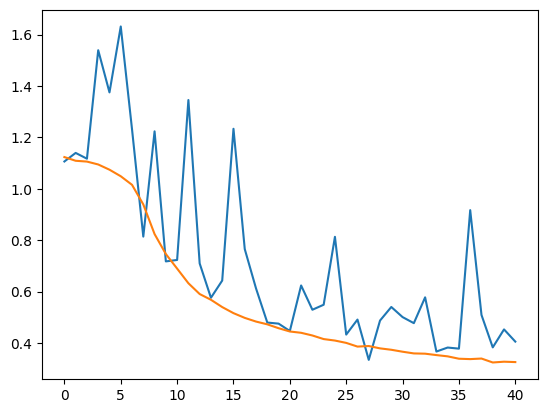

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['val_loss'])
plt.plot(history['loss'])